# Project of Hotel BooKing Cancellation- Subham Patel(Batch 24.02.23)

#  In this Case ,We will be following below ML steps:

1.Understanding the problem

2.Get the data

3.Explarotary Data Analysis

4.Data Preprocessing

5.Model Training

6.Selection one model Hyper parameter tuning

7.Evaluation the model

8.Deploy & Monitor(Conclussion)


# 1. Understanding the problem:
In this notebook, we will walk through solving a complete machine learning problem using a real-world dataset. This was a "homework" assignment given to me by my tutor to predict hotel booking cancellation .

Use the provided cancellation data of hotel to develop a model that can predict cancellation which will help hotel owner to tackle such situation.

Supervised problem: we are given both the features and the target

Classification problem: the target is a classification variable, in this case result(Hotel booking) will be:- YES or NO.

During training, we want the model to learn the relationship between the features, so we give it both the features and the answer. Then, to test how well the model has learned, we evaluate it on a testing set on a unseen data .



# 2.Get the Data
Get the Data
We will use the standard data science and machine learning libraries: numpy, pandas, and scikit-learn. We also use matplotlib and seaborn for visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**pandas: Used for data manipulation and analysis**

**numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.**

**matplotlib & Seaborn : It's plotting library, and we are going to use it for data visualization**

In [2]:
hoteldata=pd.read_csv("hotelbookings.csv")

In [3]:
pd.set_option('display.max_columns', None)
hoteldata.head(12)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


Used display.max columns function to see all the columns

In [4]:
hoteldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Find out missing data and understanding our columns
There are 32 coulumns where:-

1.Categorical-12

2.Numerical(Float+int)-20


# Missing Values :
As per my obsevation i can see few missing values from :-

1.Agent

2.Country

3.Children

3.Company

In [5]:
hoteldata.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# My Observation on Features:-

So i have classsidifed my features in to 3 rating such as :-

**High** :-hotel, lead_time, arrival_date_year, arrival_date_month, stays_in_weekend_nights, stays_in_week_nights, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, deposit_type, days_in_waiting_list, customer_type

**Medium**:-children, babies, distribution_channel, booking_changes, adr

**Low**:-arrival_date_week_number, arrival_date_day_of_month,country, meal, adults, market_segment, agent, company, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date



# Let's predict some various reason for cancellation :

1.Hotel policy of refundable which is a reason of cancellation

2.Old Guest(who already stayed) is likely to have lesser chance of cancellation

3.If room not provided at the time of booking then there is chance of customer to cancel the bookings.

4.Earlier booking have more chance for cancellation. 

5.If the customer have history of cancellation then there might be of high chance of further cancellation. 

6.Family booking with children and babies have high chance of last time cancellation.

7.Customer who have planned  to stay for longer duration likely to have chance of cancellation.

8.We can observce that there is more cancellation on City hotel compare to Resort hotel as resort hotels have more facilities comparing city one. 


# 3.Exploratory Data Analysis 

In [6]:
is_can=len(hoteldata[hoteldata['is_canceled']==1])
print("percentage of cancelation= ",is_can/len(hoteldata))
hoteldata['reservation_status'].value_counts(normalize=True)*100

percentage of cancelation=  0.37041628277075134


Check-Out    62.958372
Canceled     36.030656
No-Show       1.010972
Name: reservation_status, dtype: float64

In this steps ,we have find out percentage of cancelation and checkout(non-cancellation) & No-show type customer

In [7]:
import warnings
warnings.filterwarnings("ignore")  #to ignore warning after execution.
corr=hoteldata.corr(method="pearson")['is_canceled'][:]
corr

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

Here on the above steps ,we found out the relation of with cancellation by using pearson method as our variables are continious :-

Highest Positive Correlation:- Lead time,Previous cancellations.

Lowest positive correlation :-Total of special requests,required car parking spaces.


# Data Visualization

**Data visualizations against the target variable to cross check our predictions by using Bivariate & Multivariate Analaysis**

Cancelations in resort hotel=  0.27763354967548676
Cancelations in city hotel=  0.41726963317786464


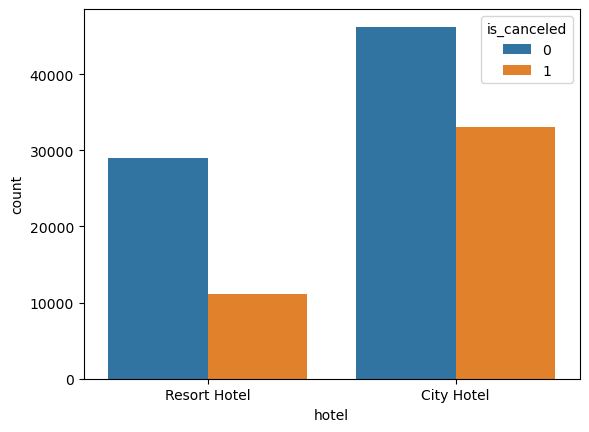

In [8]:
sns.countplot(data=hoteldata,x="hotel",hue='is_canceled')
resort_canceled=hoteldata[(hoteldata['hotel']=="Resort Hotel") &  (hoteldata["is_canceled"]==1)]
city_canceled=hoteldata[(hoteldata['hotel']=="City Hotel") & (hoteldata["is_canceled"]==1)]
print('Cancelations in resort hotel= ', (len(resort_canceled))/(len(hoteldata[hoteldata['hotel']=='Resort Hotel'])))
print('Cancelations in city hotel= ', (len(city_canceled))/(len(hoteldata[hoteldata['hotel']=='City Hotel'])))

**Hence this is categorical we have used countplot to identify which kind of hotel got more cancellation in between Resort hotel and City hotel**


From the countplot we got idea that City hotel are the one who got more cancellation ,which makes one of our prediction true.

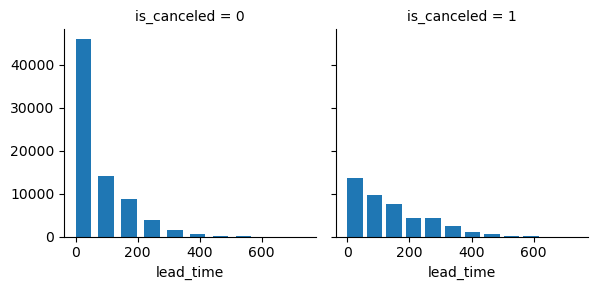

In [9]:
grid=sns.FacetGrid(hoteldata,col="is_canceled")
grid.map(plt.hist,"lead_time",width=50)
grid.add_legend()

**From this grid map another assumption which is point No- 4.Earlier booking have more chance for cancellation is invalidate.**
so we can ignore the assumption.

In [10]:
((len(hoteldata.loc[(hoteldata['children']!=0) | (hoteldata['babies']!=0)]))/len(hoteldata))*100

7.819750397855767

**We also can ignore another asssumption of our which says customer having children and babies or having both is only 8% of total population thus we neglect the assumption.**


cancellation among new guest =  0.3778508392455442
cancellation among old guest=  0.14488188976377953


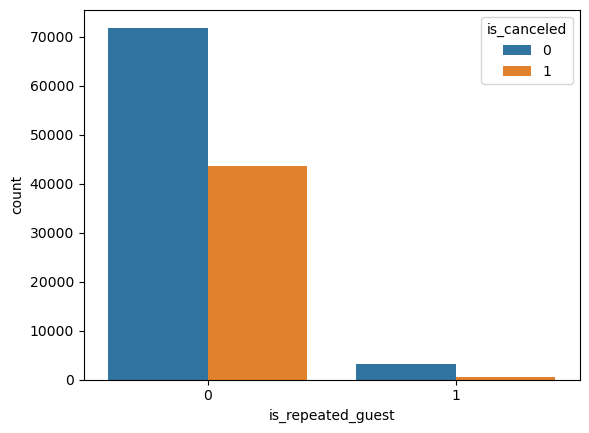

In [11]:
sns.countplot(data=hoteldata,x='is_repeated_guest',hue='is_canceled')
new_guest=hoteldata[(hoteldata['is_repeated_guest']==0) & (hoteldata['is_canceled']==1 )]
old_guest=hoteldata[(hoteldata['is_repeated_guest']==1) & (hoteldata['is_canceled']==1 )]
print("cancellation among new guest = ",(len(new_guest))/len(hoteldata[hoteldata['is_repeated_guest']==0]))
print("cancellation among old guest= " ,(len(old_guest))/len(hoteldata[hoteldata['is_repeated_guest']==1]))

**Now from this countplot graph we found out that cancelation among new guest/new comers ar likely to have more cancellation from current booking but old customer are likely to have less cancellation.**

This evidence make proves that our  one of assumption  is true

<Axes: xlabel='previous_cancellations', ylabel='count'>

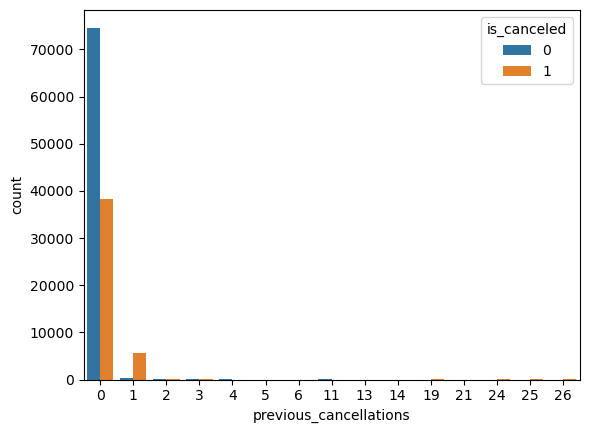

In [12]:
sns.countplot(data=hoteldata,x="previous_cancellations",hue="is_canceled")

* By using countplot - we will findout whether there is any relationship between previous cancelled customer and current cancellation. 

* After plotting the graph we came to know that the customers who have cancelled once earlier are more likely to cancel the current booking .

* This also matches with the positive correlation between previous_cancellations and is_cancelled and supports our assumptions.

In [13]:
temp=hoteldata.loc[hoteldata['reserved_room_type']!=hoteldata['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True)*100

0    94.623584
1     5.376416
Name: is_canceled, dtype: float64

**Above step was another evidence to prove our one more assuption which was customer likely to have cancel booking if they dont get same room at the time of booking**

<Axes: xlabel='booking_changes', ylabel='is_canceled'>

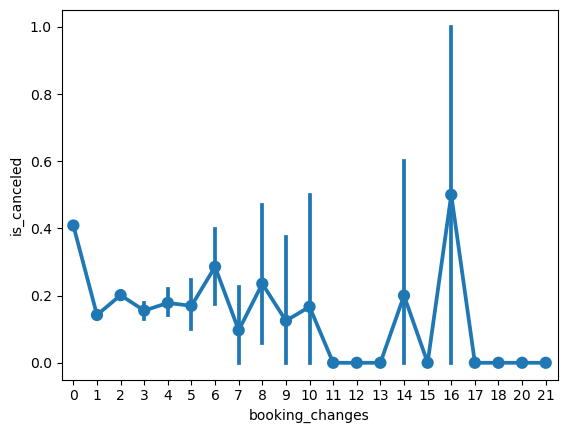

In [14]:
sns.pointplot(data=hoteldata,x="booking_changes",y="is_canceled")

No such evidence to prove whether more no of booking changes makes any changes of confirmation of hotel booking.

<Axes: xlabel='deposit_type', ylabel='count'>

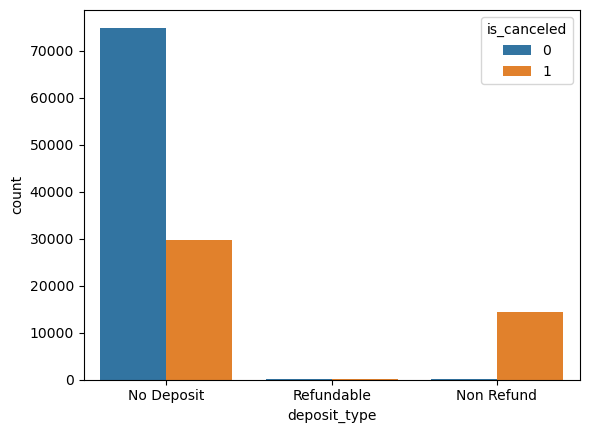

In [15]:
sns.countplot(data=hoteldata,x="deposit_type",hue="is_canceled")

**Totally denying our assumption that policy of refundable will likely to have more cancellation.**

**Also we can say that persons who have gone with Non refund have more cancellation than refundable deposit type**

<Axes: xlabel='arrival_date_year', ylabel='count'>

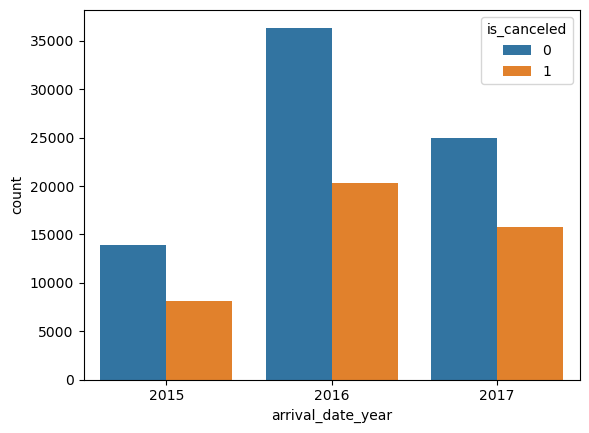

In [16]:
sns.countplot(data=hoteldata,x="arrival_date_year",hue="is_canceled")

**Observation from above graph:--**

* Most booking year- We can see most no of booking made in 2016 and on the same year most number of cancellation 
Less booking year- In 2015 ,customer made less number of booking and on the same year less number of  cancellation has been made.


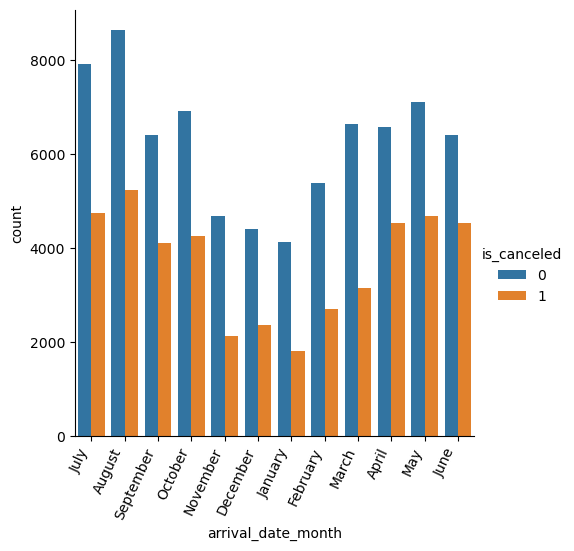

In [17]:
chart = sns.catplot(data=hoteldata, x='arrival_date_month', hue='is_canceled', kind='count')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

**From the catplot we came to know in the month of August and july of we got highest no of booking & high no of cancellation on August and july of same year of 2016**

**Now Lets know year wise cancellation from our data:-**
    

In [18]:
year_count=hoteldata.groupby(['arrival_date_year','is_canceled']).size().to_frame(name='count')
year_perfect =year_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(year_perfect)

month_count=hoteldata.groupby(['arrival_date_month','is_canceled']).size().to_frame(name='count')
month_perfect=month_count.groupby(level=0).apply(lambda x:100*x/float(x.sum()))
print(month_perfect)

                                   count
arrival_date_year is_canceled           
2015              0            62.984179
                  1            37.015821
2016              0            64.136703
                  1            35.863297
2017              0            61.302136
                  1            38.697864
                                    count
arrival_date_month is_canceled           
April              0            59.202814
                   1            40.797186
August             0            62.246883
                   1            37.753117
December           0            65.029499
                   1            34.970501
February           0            66.584036
                   1            33.415964
January            0            69.522685
                   1            30.477315
July               0            62.546402
                   1            37.453598
June               0            58.542828
                   1            41.457172


Percentage of cancellations was higher in 2015 and 2017 despite higher number of bookings in 2016. April and June had the largest cancellations overall.

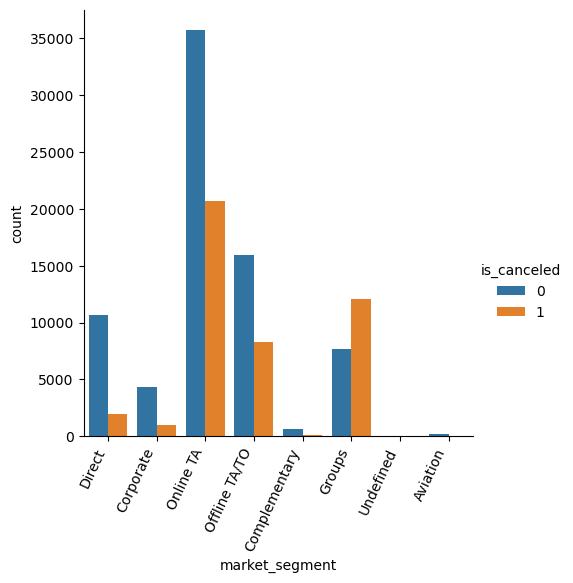

In [19]:
chart = sns.catplot(data=hoteldata, x='market_segment', hue='is_canceled', kind='count')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

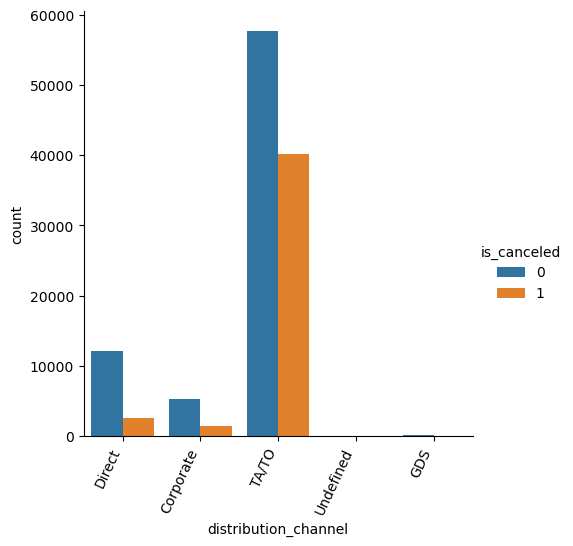

In [20]:
chart = sns.catplot(data=hoteldata, x='distribution_channel', hue='is_canceled', kind='count')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: customer_type, dtype: float64


<Axes: xlabel='customer_type', ylabel='count'>

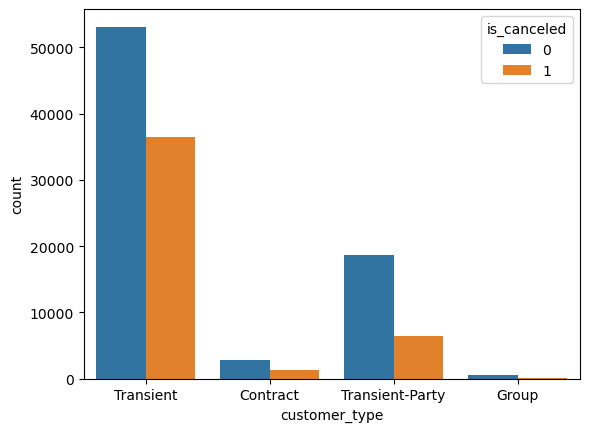

In [21]:
print(hoteldata['customer_type'].value_counts(normalize=True)*100)
sns.countplot(data=hoteldata, x='customer_type', hue='is_canceled')

* 75% bookings occur in Transient category of customers. It also sees the highest cancellation among all the categories.

In [22]:
hoteldata['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

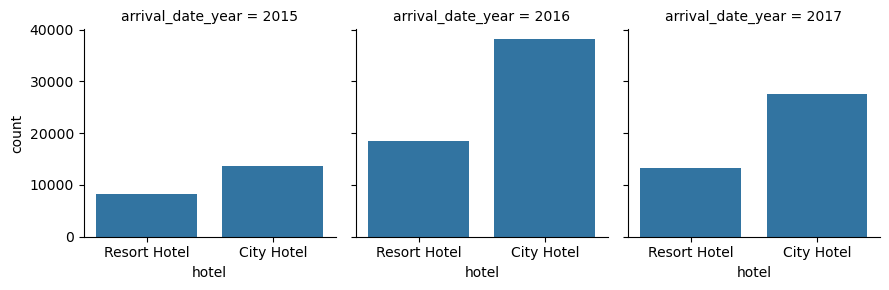

In [23]:
grid=sns.FacetGrid(hoteldata,col='arrival_date_year')
grid.map(sns.countplot,"hotel")

* From the above graph we can say 2016 is the highest booking year in which city hotel got more bookings and in 2015 less no booking. 

* In 2015 resort hotel got least bookings.

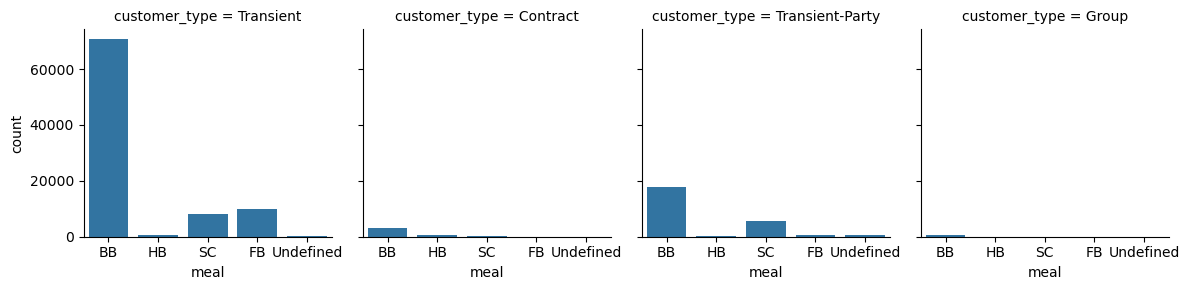

In [24]:
hoteldata['meal'].nunique(), hoteldata['customer_type'].nunique()
grid = sns.FacetGrid(hoteldata, col='customer_type')
grid.map(sns.countplot, 'meal')

* Among all the customer ,all have prefered BB type meal


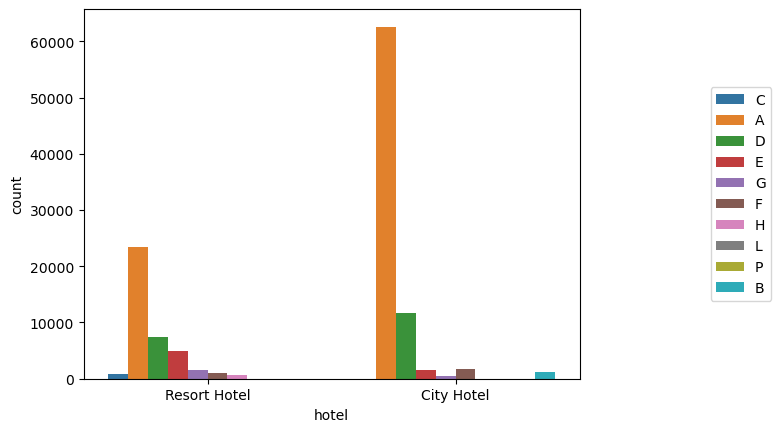

In [25]:
g = sns.countplot(data=hoteldata, x='hotel', hue='reserved_room_type')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

* In Resort hotel A type room got highest no of booking follwer by D and E.
* In City hotel A type room got highest no of booking follwer by D and F.


In [26]:
print('TABLE 1')
print(hoteldata.groupby(['customer_type','deposit_type']).size())

TABLE 1
customer_type    deposit_type
Contract         No Deposit       3530
                 Non Refund        544
                 Refundable          2
Group            No Deposit        569
                 Refundable          8
Transient        No Deposit      76684
                 Non Refund      12909
                 Refundable         20
Transient-Party  No Deposit      23858
                 Non Refund       1134
                 Refundable        132
dtype: int64


**In each kind of hotel bookings,Group by booking are less while more no of booking came from Trasient type followed by Transient-party.**

In [27]:
print(hoteldata.groupby(['customer_type', 'deposit_type']).size())

customer_type    deposit_type
Contract         No Deposit       3530
                 Non Refund        544
                 Refundable          2
Group            No Deposit        569
                 Refundable          8
Transient        No Deposit      76684
                 Non Refund      12909
                 Refundable         20
Transient-Party  No Deposit      23858
                 Non Refund       1134
                 Refundable        132
dtype: int64


**Surprisingly, between refundable and non-refundable type, higher number of people book hotels that are non-refundable ,also Each category of customers book hotels without deposit.**

In [28]:
print(hoteldata.groupby(['customer_type', 'distribution_channel']).size())
print("-"*60)
print(hoteldata.groupby(['customer_type', 'market_segment']).size())

customer_type    distribution_channel
Contract         Corporate                  27
                 Direct                     19
                 TA/TO                    4030
Group            Corporate                  31
                 Direct                    116
                 TA/TO                     430
Transient        Corporate                4157
                 Direct                  12343
                 GDS                       193
                 TA/TO                   72919
                 Undefined                   1
Transient-Party  Corporate                2462
                 Direct                   2167
                 TA/TO                   20491
                 Undefined                   4
dtype: int64
------------------------------------------------------------
customer_type    market_segment
Contract         Complementary         2
                 Corporate            22
                 Direct               14
                 Groups     

**Some observation :-In customer type & distribution channel :-We already know that hotel got more booking from transient customer type and from transient customer type from TA/TO channel hote got more number of bookings.**


**In customer type & Market segment :-Hotel got more booking from transient customer type and from transient customer type from offline TA/TO channel hotel got more number of bookings.**

In [29]:
print(hoteldata.groupby(['hotel', 'distribution_channel']).size())
print("-"*40)
print(hoteldata.groupby(['hotel', 'market_segment']).size())

hotel         distribution_channel
City Hotel    Corporate                3408
              Direct                   6780
              GDS                       193
              TA/TO                   68945
              Undefined                   4
Resort Hotel  Corporate                3269
              Direct                   7865
              TA/TO                   28925
              Undefined                   1
dtype: int64
----------------------------------------
hotel         market_segment
City Hotel    Aviation            237
              Complementary       542
              Corporate          2986
              Direct             6093
              Groups            13975
              Offline TA/TO     16747
              Online TA         38748
              Undefined             2
Resort Hotel  Complementary       201
              Corporate          2309
              Direct             6513
              Groups             5836
              Offline TA/TO   

Some Observation:-


In [30]:
group = hoteldata.groupby(['customer_type', 'reservation_status']).size()
group_pcts = group.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
group_pcts

customer_type    reservation_status
Contract         Canceled              30.323847
                 Check-Out             69.038273
                 No-Show                0.637880
Group            Canceled               9.532062
                 Check-Out             89.774697
                 No-Show                0.693241
Transient        Canceled              39.678395
                 Check-Out             59.253680
                 No-Show                1.067925
Transient-Party  Canceled              24.554211
                 Check-Out             74.570132
                 No-Show                0.875657
dtype: float64

**Eventhough Transient having more no of bookings ,we can observe percentage wise more no of cancellation is from Transient type**

In [31]:
hoteldata.pivot_table(columns='hotel', values=['stays_in_weekend_nights', 'stays_in_week_nights'], aggfunc=lambda x:x.sum())

hotel,City Hotel,Resort Hotel
stays_in_week_nights,173174,125337
stays_in_weekend_nights,63082,47664


**From the above pivot table we can observe that City hotel got more booking on weekdays & weekends as compare to Resort Hotel**

In [32]:
hoteldata.pivot_table(columns='hotel', values='total_of_special_requests', aggfunc=lambda x:x.sum())

hotel,City Hotel,Resort Hotel
total_of_special_requests,43387,24828


**From the above table we can know observe more special request has been made in city hotel.**

<Figure size 500x500 with 0 Axes>

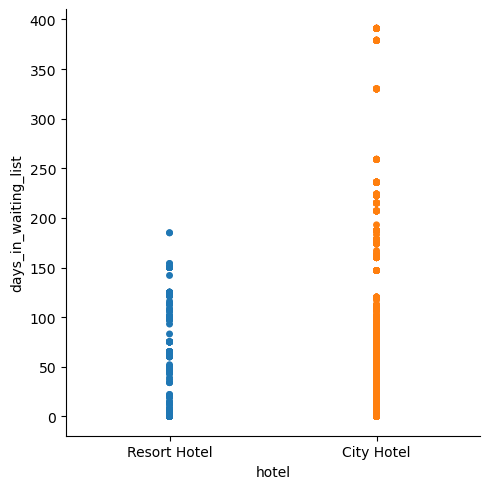

In [33]:
plt.figure(figsize=(5,5))
sns.catplot(data=hoteldata,x='hotel',y='days_in_waiting_list',jitter=False,hue='hotel')

**In order to get a room in city Hotel a person  have to face a waiting list for both the hotel but the waiting time in city hotel is more as it is higher demand**

In [34]:
hoteldata['country'].value_counts(normalize=True)*100

PRT    40.865587
GBR    10.200838
FRA     8.759314
ESP     7.205934
DEU     6.128576
         ...    
DJI     0.000841
BWA     0.000841
HND     0.000841
VGB     0.000841
NAM     0.000841
Name: country, Length: 177, dtype: float64

**Top contributor of hotel bookingg is from portugal,Great Britan,France ,ESP,DEU.
Also from 177 country bookings had been made.**

<Axes: xlabel='country', ylabel='is_canceled'>

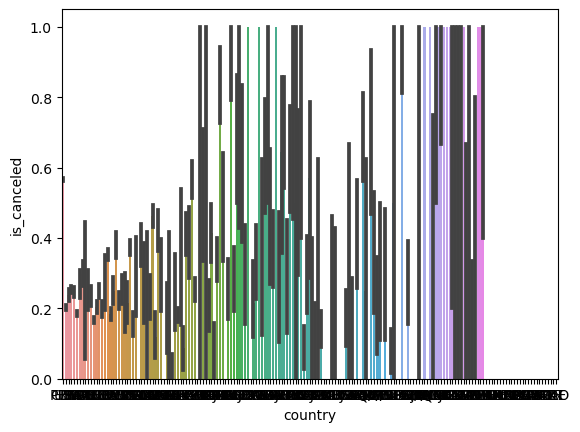

In [35]:
sns.barplot(data=hoteldata, x='country', y='is_canceled')

**Lets' Understand booking from top 5 different country and their distributdistribution channel by performing multivariate analysis**



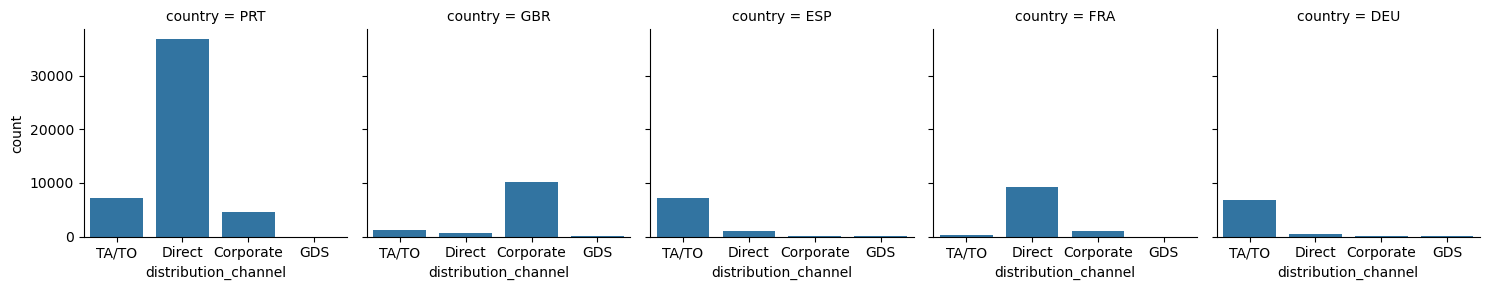

In [36]:
temp = hoteldata.loc[(hoteldata['country']=='PRT') | (hoteldata['country']=='GBR') | (hoteldata['country']=='FRA') | (hoteldata['country']=='ESP') | (hoteldata['country']=='DEU')]
grid = sns.FacetGrid(temp, col='country')
grid.map(sns.countplot, 'distribution_channel')

**Observation from above facetgrid:-**

* Portugal:- The more no customer from portugal are Directy type customer.

* GBR:- The more no customer from GBR booking are corporate bookings.

* ESP:- The more no customer from ESP are made by TA/TO 

* DEU:- The more no customer booking from DEU is from TA/TO.

* FRA:- From france more no of bookings made are direct type .


<Axes: xlabel='customer_type', ylabel='total_of_special_requests'>

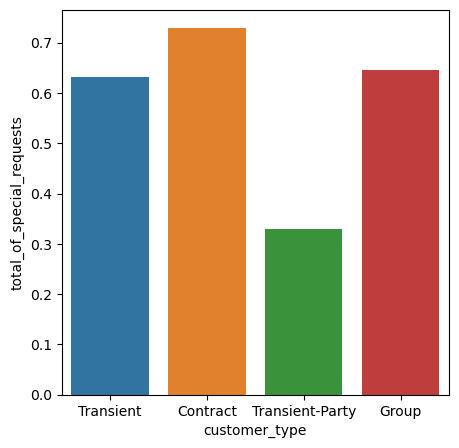

In [37]:
plt.figure(figsize=(5,5))
sns.barplot(data=hoteldata, x='customer_type', y='total_of_special_requests', ci=None)

**More no special bookings request is from contract type customer follwed by Group type and rest of the type**

<Axes: xlabel='distribution_channel', ylabel='lead_time'>

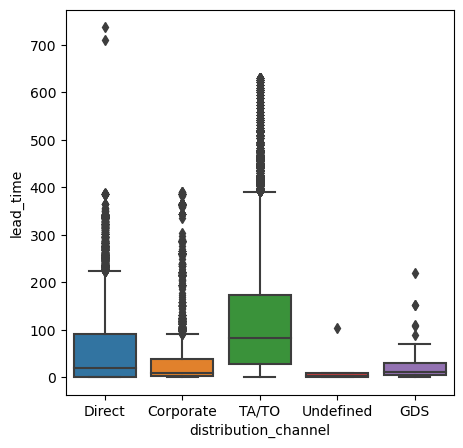

In [38]:
plt.figure(figsize=(5,5))
sns.boxplot(data=hoteldata,x='distribution_channel',y='lead_time')

**We can see that there is more lead time from TA/TO of distribution channel.**

Lets find out corelation heatmap feature by using matplot-correlation


<Axes: >

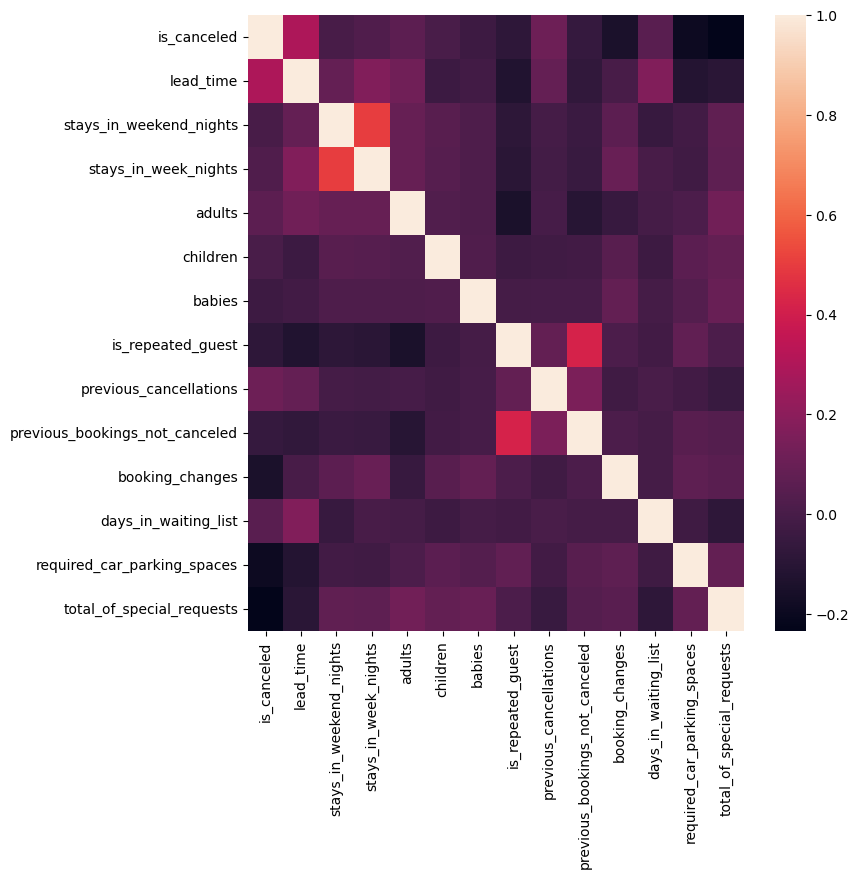

In [41]:
matplot = ['is_canceled',
 'lead_time',
'stays_in_weekend_nights',
 'stays_in_week_nights', 
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

plt.figure(figsize = (8,8))
cormat = hoteldata[matplot].corr()
sns.heatmap(cormat)

**From the Heatmap scale :- The more the colour is dark the lesser chance of impact on booking cancellations.From the above heatmap the major feature on cancellation is lead time.**

In [42]:
#Lets print the most correlated features to the target variable, in descending order
cancel_correlation_array = hoteldata.corr()['is_canceled']
cancel_correlation_array.abs().sort_values(ascending = False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

**As per cor relation table :-No 1 factor for cancellation is lead time followed by special requests,require car parking spaces,boooking changes,previous cancellation,is repeated guest,agent,adults and so on.**


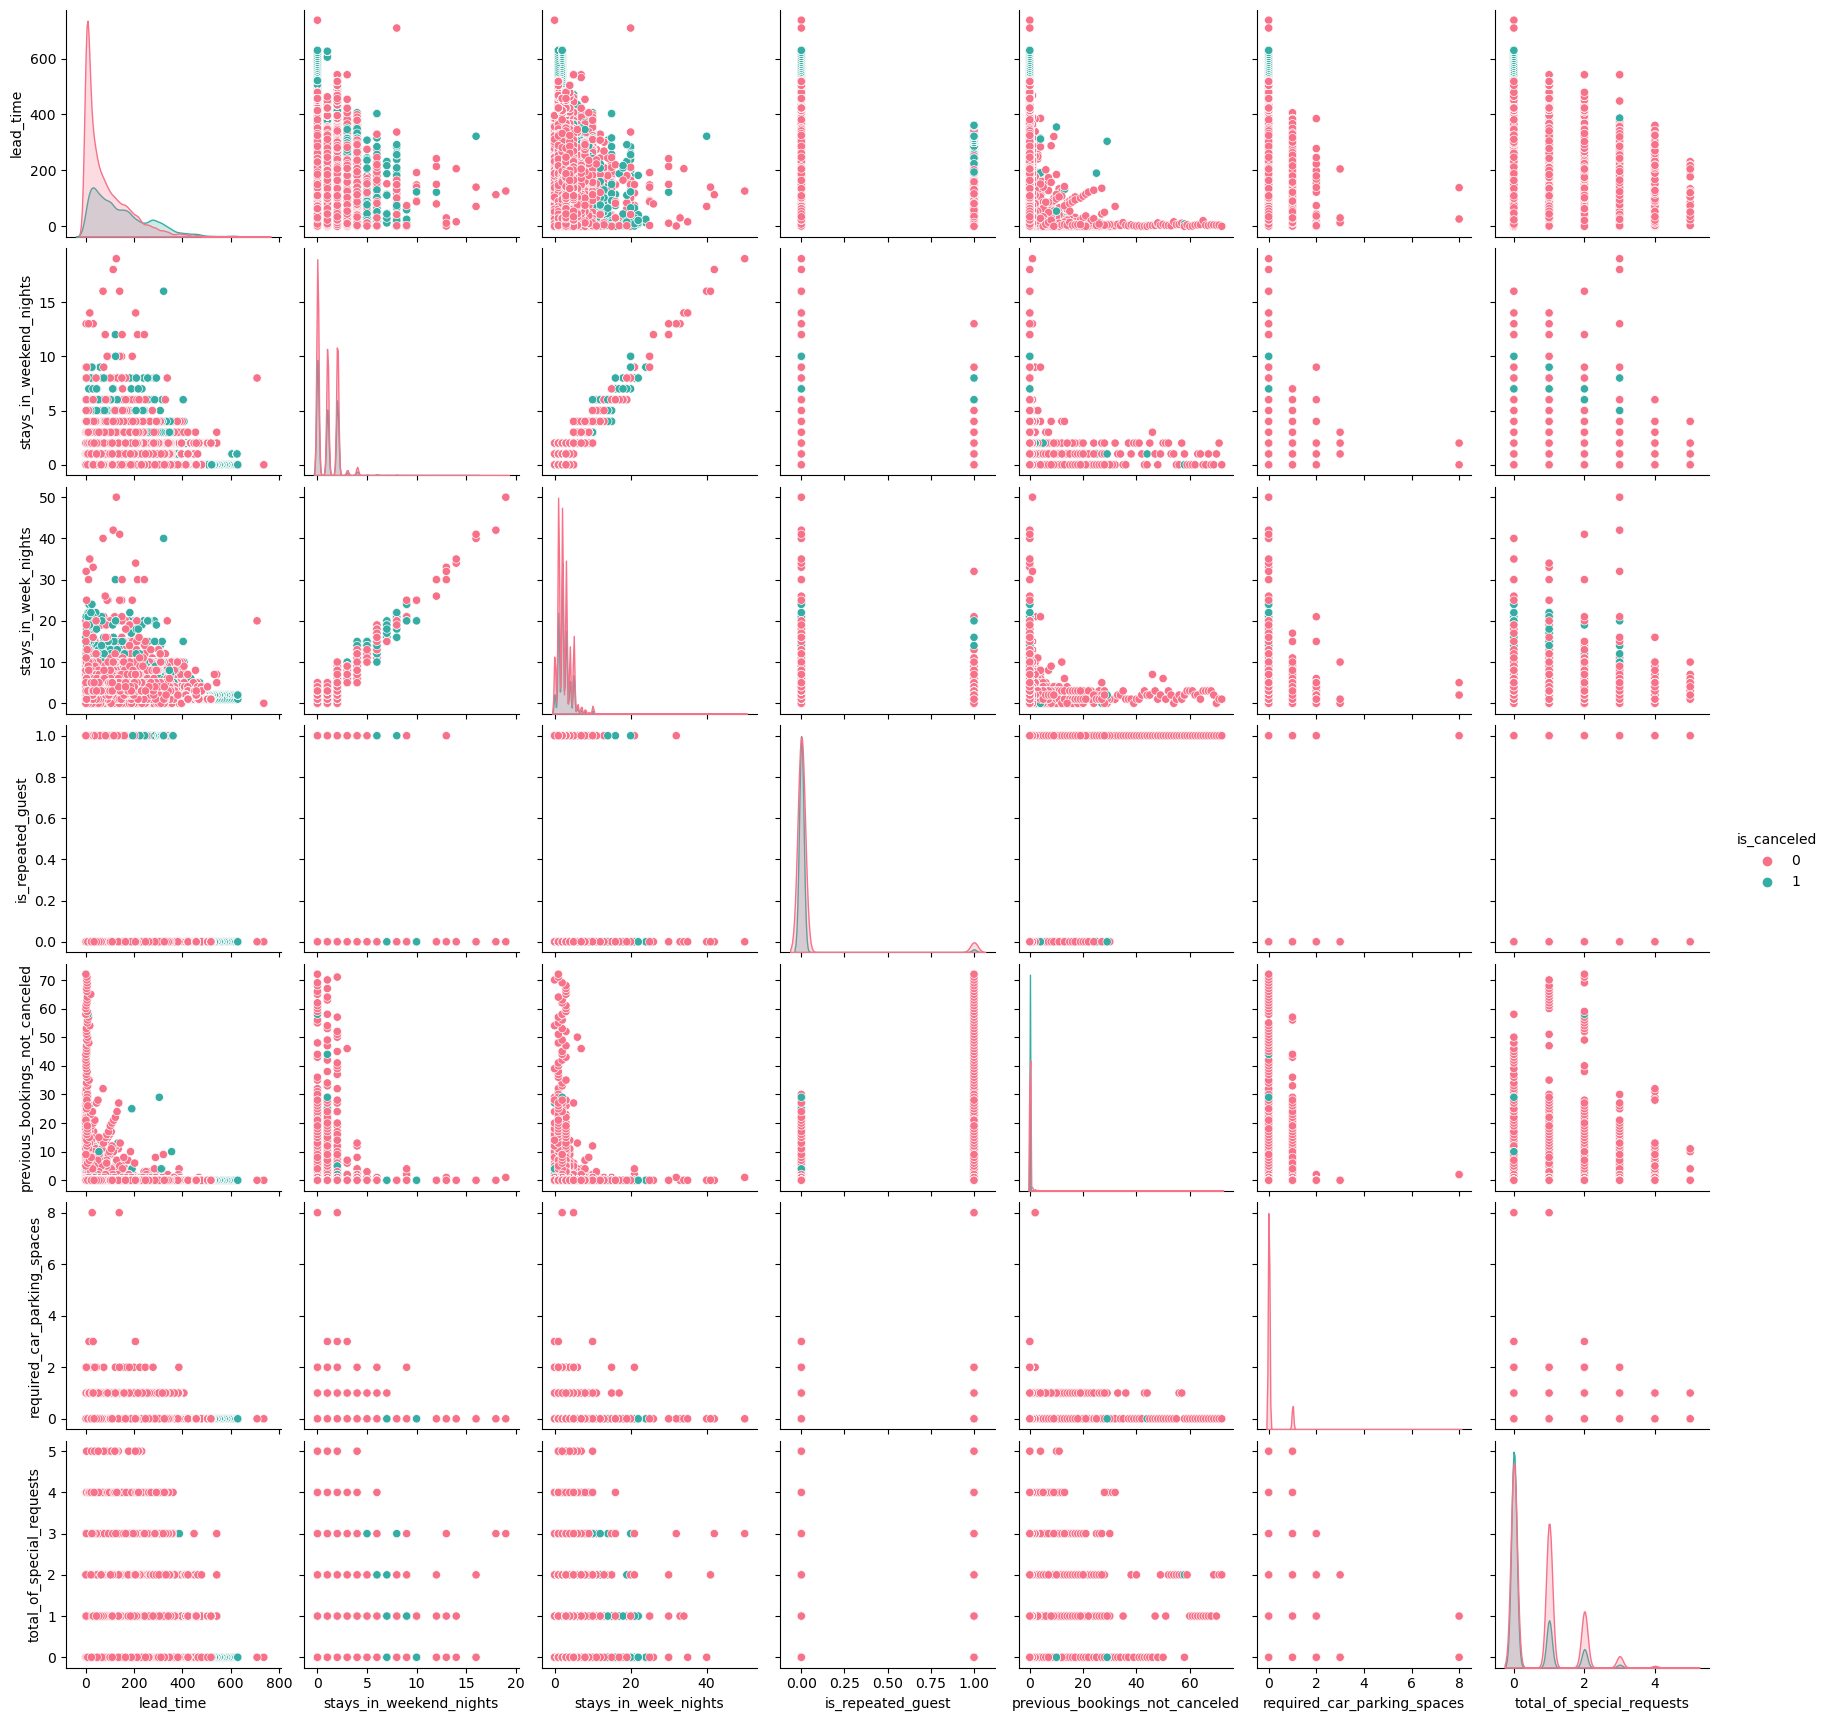

In [145]:
#pairplot of categorical features:-

categorical= ['is_canceled',
    'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
'previous_bookings_not_canceled',
         'required_car_parking_spaces',
 'total_of_special_requests'
]

%config InlineBackend.figure_format = 'png'
sns.pairplot(hoteldata[categorical], hue = 'is_canceled', palette = 'husl')

# 4. Data Preprocessing

**Steps to be followed :-**
1. Handling missing values
2. Handling non-numeric data (handling categorical, ordinal variables and strings)
3. Feature engineering and creating new features out of existing features.
4. Extracting only useful and relevant features: Feature selection
5. Remove features with missing values above a particular threshold
6. Splitting data into Training and test sets

# Handling missing values

In [43]:
hoteldata.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**There is some missig values ,lets fix this as :-**
 
1. We can assume the customer those dont have children left the options to fill ,so lets replace it with 0.

2. People with missing values in agent id might have booked themselves, so we may replace it with 0.

3.  Similarly, NaN value in company column signifies the customer has booked it personally and not on the expense of company.

4. Replacing missing values of country to unknown 


In [44]:
nan_replacement_dict={'agent':0, 'company':0 , 'children':0 , 'country':'UNKNOWN'}
hoteldata.fillna(nan_replacement_dict,inplace=True)

In [45]:
hoteldata.isna().any().sum()

0

**Rechecking for any missing values before preprocessing**

In [46]:
hoteldata.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

 **Dropping columns that might cause data leakage**

In [47]:
hoteldata.drop(['meal','reservation_status', 'reservation_status_date' , 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1, inplace = True)

In [48]:
hoteldata.shape

(119390, 25)

In [49]:
hoteldata.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

# Preprocessing step

In [50]:
#Copying dataframe so that we don't need to dropcolumns from the main dataframe inplace
new = hoteldata.copy()

In [51]:
#We will manually do onehot encoding for hotel
#hotel={'City_Hotel':1,'Resort_Hotel':0}
#new['hotel']=new['hotel'].map({'City_Hotel':1,'Resort_hotel':0})
#new['hotel_encoded']=new['hotel_encoded'].map({'City_Hotel:1','Resort_Hotel:0'})

##The above steps didnt worked for me so i tried to do in onehot encoding

**Onehot encoding**

In [52]:
new =pd.get_dummies(data = new, columns = ['hotel',
                                           'market_segment', 'distribution_channel',
                                            'reserved_room_type', 'assigned_room_type', 'customer_type', 'deposit_type'], drop_first = True)

In [53]:
from sklearn.preprocessing import LabelEncoder, StandardScaler ,MinMaxScaler

In [54]:
le=LabelEncoder()
new['country']= le.fit_transform(new['country'])

* Label Encoding Country column as it has more than 300 categories. 
* It will create a large  no. of columns, if we choose to do one hot encoding

In [55]:
new.head(56395)

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable
0,0,342,2015,1,0,2,0.0,0,135,0,0,0,3,0.0,0,0.00,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,737,2015,1,0,2,0.0,0,135,0,0,0,4,0.0,0,0.00,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,7,2015,1,1,1,0.0,0,59,0,0,0,0,0.0,0,75.00,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,13,2015,1,1,1,0.0,0,59,0,0,0,0,0.0,0,75.00,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,14,2015,1,2,2,0.0,0,59,0,0,0,0,0.0,0,98.00,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56390,1,67,2016,4,3,2,0.0,0,133,0,0,0,0,0.0,0,119.16,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
56391,1,58,2016,4,4,2,0.0,0,133,0,0,0,0,0.0,0,128.10,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
56392,1,40,2016,4,5,0,2.0,0,43,0,0,0,0,0.0,0,106.90,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
56393,1,53,2016,4,5,2,0.0,0,59,0,0,0,0,0.0,0,131.14,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
new.shape

(119390, 55)

In [57]:
new.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_day_of_month         0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
country                           0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
company                           0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
hotel_Resort Hotel                0
market_segment_Complementary      0
market_segment_Corporate          0
market_segment_Direct             0
market_segment_Groups             0
market_segment_Offline TA/TO      0
market_segment_Online TA          0
market_segment_Undefined          0
distribution_channel_Direct       0
distribution_channel_GDS    

**Rechecking all features after encoding part**

**Data spliting**- To make ready train & test datasets.

In [58]:
x = new.drop(['is_canceled'],axis=1)
y = new['is_canceled']
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((95512, 54), (95512,), (23878, 54), (23878,))

**i have set 80% for training and 20% for testing.**

# Data Scaling

**We have to use scaling for Logisitic regression & KNN algorithm as their gradient to reach the global min point.**

**We normally dont us scalling on Decision tree & Random forest cause their branches will be created on conditions.**


In [60]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Lets' Import some library algorithm to predict


In [61]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Model Training

In [61]:
#we will perform logistic Regresion on it

classifier=LogisticRegression()
lr=classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred_train=classifier.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))


For test data
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     15176
           1       0.81      0.63      0.71      8702

    accuracy                           0.81     23878
   macro avg       0.81      0.77      0.78     23878
weighted avg       0.81      0.81      0.80     23878

For train data
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     59990
           1       0.81      0.62      0.70     35522

    accuracy                           0.80     95512
   macro avg       0.81      0.77      0.78     95512
weighted avg       0.80      0.80      0.80     95512



In [62]:
#Naive's Bayees

classifier=GaussianNB()
gnb=classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred_train=classifier.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     15176
           1       0.98      0.33      0.49      8702

    accuracy                           0.75     23878
   macro avg       0.85      0.66      0.66     23878
weighted avg       0.81      0.75      0.71     23878

For train data
              precision    recall  f1-score   support

           0       0.72      1.00      0.83     59990
           1       0.98      0.33      0.50     35522

    accuracy                           0.75     95512
   macro avg       0.85      0.66      0.67     95512
weighted avg       0.81      0.75      0.71     95512



In [63]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(random_state=77,max_depth=10,max_leaf_nodes=7,criterion='entropy')
dt=classifier2.fit(x_train,y_train)
y_pred=classifier2.predict(x_test)
y_pred_train=classifier2.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.87      0.76      0.81     15176
           1       0.65      0.81      0.72      8702

    accuracy                           0.77     23878
   macro avg       0.76      0.78      0.77     23878
weighted avg       0.79      0.77      0.78     23878

For train data
              precision    recall  f1-score   support

           0       0.87      0.76      0.81     59990
           1       0.66      0.81      0.73     35522

    accuracy                           0.78     95512
   macro avg       0.77      0.78      0.77     95512
weighted avg       0.79      0.78      0.78     95512



In [64]:
from sklearn.svm import SVC

In [65]:
#SVC

Model=SVC()
svc=Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
y_pred_train=Model.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     15176
           1       0.83      0.71      0.77      8702

    accuracy                           0.84     23878
   macro avg       0.84      0.81      0.82     23878
weighted avg       0.84      0.84      0.84     23878

For train data
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     59990
           1       0.84      0.71      0.77     35522

    accuracy                           0.84     95512
   macro avg       0.84      0.82      0.83     95512
weighted avg       0.84      0.84      0.84     95512



In [67]:
#KNN

Model=KNeighborsClassifier()
svc=Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
y_pred_train=Model.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))


For test data
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     15176
           1       0.79      0.76      0.77      8702

    accuracy                           0.84     23878
   macro avg       0.83      0.82      0.82     23878
weighted avg       0.84      0.84      0.84     23878

For train data
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     59990
           1       0.87      0.83      0.85     35522

    accuracy                           0.89     95512
   macro avg       0.89      0.88      0.88     95512
weighted avg       0.89      0.89      0.89     95512



# Test Data Accuracy Result:-

* KNN - Test Accuracy is 0.84
* SVC - Test Acccuracy is 0.84
* Naive's Bayes - Test Accuracy is 0.75
* Logisctic Regression - Test Accuracy is 0.81
* Decision Tree - Test Acuracy is 0.77

# 6.Hyper parameter tuning for better accuracy

**My best Test accuracy is from Logistic regression which is from KNN & Logisitc Regression**

In [83]:
#Hyperparameter for Decision Tree


In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[2,3,4,5,6,8,10,14,16], 'criterion':['gini','entropy'],
             'max_leaf_nodes':[2,5,10,15,20,25,30],'min_samples_split':[10,20,30,40]}
dt1=DecisionTreeClassifier(random_state=77)
grid=GridSearchCV(dt1,param_grid,cv=10)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_leaf_nodes': 30,
 'min_samples_split': 10}

In [66]:
classifier3=DecisionTreeClassifier(random_state=77,max_depth=8,max_leaf_nodes=30,criterion='gini',min_samples_split=10)
dt=classifier3.fit(x_train,y_train)
y_pred=classifier3.predict(x_test)
y_pred_train=classifier3.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     15176
           1       0.74      0.74      0.74      8702

    accuracy                           0.81     23878
   macro avg       0.80      0.80      0.80     23878
weighted avg       0.81      0.81      0.81     23878

For train data
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     59990
           1       0.76      0.74      0.75     35522

    accuracy                           0.82     95512
   macro avg       0.80      0.80      0.80     95512
weighted avg       0.81      0.82      0.81     95512



In [ ]:
#Hyperparameter for KNN

param_grid = {'n_neighbors':[5,10,15], 'weights':['uniform’, ‘distance']}
Model=KNeighborsClassifier(random_state=30)
grid=GridSearchCV(Model,param_grid,cv=10)
grid.fit(x_train,y_train)
grid.best_params_

In [ ]:
Model=KNeighborsClassifier()
KNN=Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
y_pred_train=Model.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))


# Tried to find best hyparameter by grid search i ran this for 6 days but didnt able to complete the execution

In [ ]:
#Hyperparameter for SVM

param_grid = {'C':[0.1,1,5,10], 'kernel':['rbf',],
             'gamma':[1,0.1,0.01,0.001,0.0001]}
Model=SVC(random_state=77)
grid=GridSearchCV(Model,param_grid,cv=10)
grid.fit(x_train,y_train)
grid.best_params_

In [ ]:

Model=SVC(random_state=30,C=,kernel=,gamma=)
svc=Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
y_pred_train=Model.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))


In [ ]:
#Hyper parameter for LogisticRegression 


In [ ]:
param_grid = {'penalty':['l1','l2'],
               'C':[1.0],
               'solver':['lbfgs'],
                 'max_iter': [100,500]}
lr1=LogisticRegression(random_state=None)
grid=GridSearchCV(lr1,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

In [ ]:
classifier=LogisticRegression(C= 1.0,max_iter= 500,penalty='l2',solver='lbfgs')
lr=classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred_train=classifier.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))


**Not able to find hyparameter tuning by gridsearch due to less computation power of my system.**

#  7.Summary

KNN  and SVM are the best algorithm to predict the cancellation. 
* Both are giving 85% accurate predictions nearly.
* Features importance is not present in KNN or SVM ,thus we wont be able to plot the graph(Applicable with Random Forest)..
